<a href="https://colab.research.google.com/github/Minyst/ML_DL_Portfolio_KR/blob/main/Credit%20Card%20Fraud%20Detection/Credit%20Card%20Fraud%20Detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val , y_tr, y_val = train_test_split(train_pca,y_train,test_size=0.2,random_state=1000)

# RandomForest

#Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
rf.fit(x_tr,y_tr)
val_pred_rf = rf.predict(x_val)
val_pred_ratio_rf = rf.predict_proba(x_val)[:,1]

print('accuracy_score: {}'.format(accuracy_score(y_val,val_pred_rf)))
print('f1_score: {}'.format(f1_score(y_val,val_pred_rf)))
print('recall_score: {}'.format(recall_score(y_val,val_pred_rf)))
print('precision_score: {}'.format(precision_score(y_val,val_pred_rf)))
print('roc_auc_score: {}'.format(roc_auc_score(y_val,val_pred_ratio_rf)))

accuracy_score: 0.9985704612143556
f1_score: 0.1492537313432836
recall_score: 0.09433962264150944
precision_score: 0.35714285714285715
roc_auc_score: 0.72351430493826


## Confusion Matrix

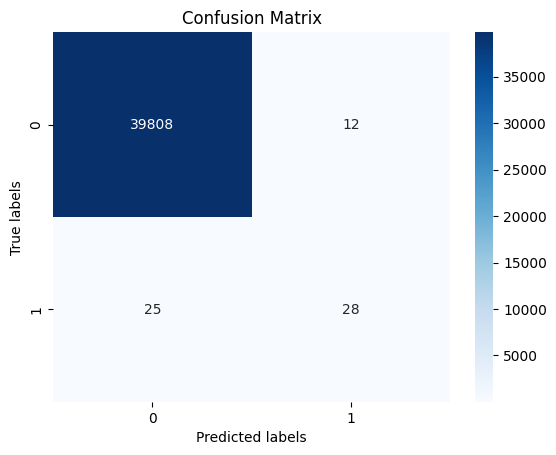

In [ ]:
cm = confusion_matrix(y_val, val_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Tuning



## GridSearch

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, refit=True, verbose=2)
grid_search.fit(train_pca, y_train)

print("Best parameters found by Grid Search for Random Forest:")
print(grid_search.best_params_)

## Predict - PCA





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=5,n_estimators=100)
rf.fit(train_pca,y_train)
rf_grid_pred = rf.predict(test_pca)
rf_grid_pred_pb = rf.predict_proba(test_pca)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,rf_grid_pred)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,rf_grid_pred_pb)))

accuracy_score : 0.9982678510820079
roc_auc_score : 0.8832333887319526


## RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),

}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, refit=True, verbose=2, random_state=42)
random_search.fit(train_pca, y_train)

print("Best parameters found by Random Search for Random Forest:")
print(random_search.best_params_)

## Predict - PCA

In [ ]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=7, min_samples_split=2, n_estimators=171)
rf.fit(train_pca,y_train)
rf_random_pred = rf.predict(test_pca)
rf_random_pred_pb = rf.predict_proba(test_pca)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,rf_random_pred)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,rf_random_pred_pb)))

accuracy_score : 0.9982678510820079
roc_auc_score : 0.7790637184461557


# XGBoost

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

##Score

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(x_tr,y_tr)
val_pred_xgb = xgb.predict(x_val)
val_pred_ratio_xgb = xgb.predict_proba(x_val)[:,1]

print('accuracy_score: {}'.format(accuracy_score(y_val,val_pred_xgb)))
print('f1_score: {}'.format(f1_score(y_val,val_pred_xgb)))
print('recall_score: {}'.format(recall_score(y_val,val_pred_xgb)))
print('precision_score: {}'.format(precision_score(y_val,val_pred_xgb)))
print('roc_auc_score: {}'.format(roc_auc_score(y_val,val_pred_ratio_xgb)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:41:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


accuracy_score: 0.9984450630752639
f1_score: 0.3921568627450981
recall_score: 0.37735849056603776
precision_score: 0.40816326530612246
roc_auc_score: 0.9664629985879856


## Confusion Matrix

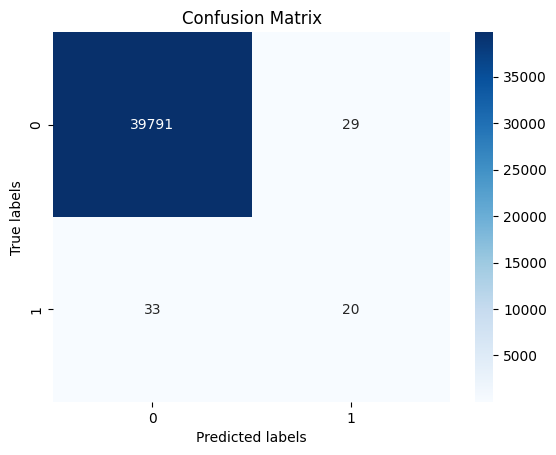

In [ ]:
cm = confusion_matrix(y_val, val_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Predict - PCA

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(train_pca, y_train)
xgb_pred_pca = xgb.predict(test_pca)
xgb_pred_pca_pb = xgb.predict_proba(test_pca)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,xgb_pred_pca)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,xgb_pred_pca_pb)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


accuracy_score : 0.9981625177018597
roc_auc_score : 0.8344195740379573


##Predict - tSNE

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(train_tsne, y_train, eval_set=[(test_tsne, y_test)], early_stopping_rounds=100, verbose = 100)
xgb_pred_tsne = xgb.predict(test_tsne)
xgb_pred_tsne_pb = xgb.predict_proba(test_tsne)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,xgb_pred_tsne)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,xgb_pred_tsne_pb)))

[0]	validation_0-logloss:0.10717


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-logloss:0.01126
[132]	validation_0-logloss:0.01133
accuracy_score : 0.9982678510820079
roc_auc_score : 0.8722547185206192


##Predict - UMAP

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(train_umap, y_train, eval_set=[(test_umap, y_test)], early_stopping_rounds=100, verbose = 100)
xgb_pred_umap = xgb.predict(test_umap)
xgb_pred_umap_pb = xgb.predict_proba(test_umap)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,xgb_pred_umap)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,xgb_pred_umap_pb)))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.10718


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-logloss:0.01055
[149]	validation_0-logloss:0.01072
accuracy_score : 0.9982678510820079
roc_auc_score : 0.8535454060074494


#LightGBM

In [ ]:
!pip install lightgbm
from lightgbm import LGBMClassifier

##Score

In [ ]:
lgb = LGBMClassifier(num_leaves=30, objective='binary')
lgb.fit(x_tr, y_tr)
val_pred_lgb = lgb.predict(x_val)
val_pred_ratio_lgb = lgb.predict_proba(x_val)[:,1]

print('accuracy_score: {}'.format(accuracy_score(y_val,val_pred_lgb)))
print('f1_score: {}'.format(f1_score(y_val,val_pred_lgb)))
print('recall_score: {}'.format(recall_score(y_val,val_pred_lgb)))
print('precision_score: {}'.format(precision_score(y_val,val_pred_lgb)))
print('roc_auc_score: {}'.format(roc_auc_score(y_val,val_pred_ratio_lgb)))

[LightGBM] [Info] Number of positive: 291, number of negative: 159200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001825 -> initscore=-6.304593
[LightGBM] [Info] Start training from score -6.304593
accuracy_score: 0.9955358262483385
f1_score: 0.16037735849056603
recall_score: 0.32075471698113206
precision_score: 0.1069182389937107
roc_auc_score: 0.9325144755171858


## Confusion Matrix

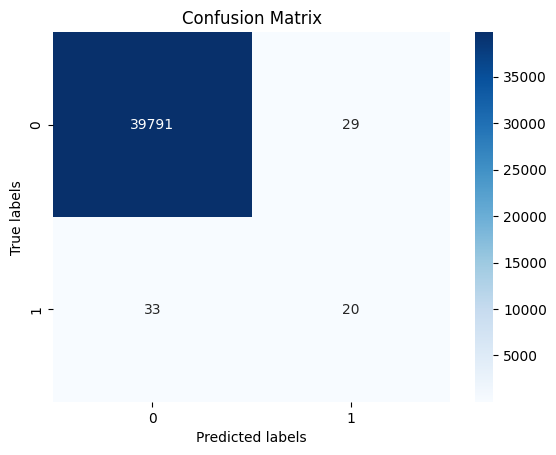

In [ ]:
cm = confusion_matrix(y_val, val_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Predict - PCA

In [ ]:
lgb = LGBMClassifier(num_leaves=30, objective='binary')
lgb.fit(train_pca,y_train)
lgb_pred_pca = lgb.predict(test_pca)
lgb_pred_pca_pb = lgb.predict_proba(test_pca)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,lgb_pred_pca)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,lgb_pred_pca_pb)))

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
accuracy_score : 0.9978348138525098
roc_auc_score : 0.8464984402304878


##Predict - tSNE

In [ ]:
lgb = LGBMClassifier(num_leaves=30, objective='binary')
lgb.fit(train_tsne,y_train)
lgb_pred_tsne = lgb.predict(test_tsne)
lgb_pred_tsne_pb = lgb.predict_proba(test_tsne)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,lgb_pred_tsne)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,lgb_pred_tsne_pb)))

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
accuracy_score : 0.9971911098627155
roc_auc_score : 0.8131757350879222


##Predict - UMAP

In [ ]:
lgb = LGBMClassifier(num_leaves=30, objective='binary')
lgb.fit(train_umap,y_train)
lgb_pred_umap = lgb.predict(test_umap)
lgb_pred_umap_pb = lgb.predict_proba(test_umap)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,lgb_pred_umap)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,lgb_pred_umap_pb)))

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
accuracy_score : 0.9973432580784851
roc_auc_score : 0.8222448956958601


#CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


##Score

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(verbose=False)
cb.fit(x_tr,y_tr)
val_pred_cb = cb.predict(x_val)
val_pred_ratio_cb = cb.predict_proba(x_val)[:,1]
print('accuracy_score: {}'.format(accuracy_score(y_val,val_pred_cb)))
print('f1_score: {}'.format(f1_score(y_val,val_pred_cb)))
print('recall_score: {}'.format(recall_score(y_val,val_pred_cb)))
print('precision_score: {}'.format(precision_score(y_val,val_pred_cb)))
print('roc_auc_score: {}'.format(roc_auc_score(y_val,val_pred_ratio_cb)))

accuracy_score: 0.9986206204699922
f1_score: 0.03508771929824561
recall_score: 0.018867924528301886
precision_score: 0.25
roc_auc_score: 0.8714059967969068


##Confusion Matrix

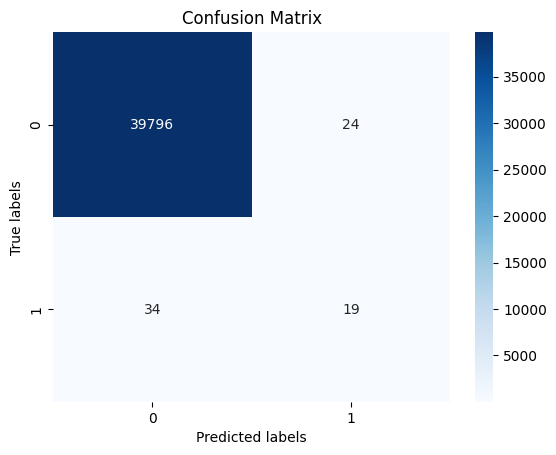

In [ ]:
cm = confusion_matrix(y_val, val_pred_cb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##Predict - PCA

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(verbose=False)
cb.fit(train_pca,y_train)
cb_pred_pca = cb.predict(test_pca)
cb_pred_pca_pb = cb.predict_proba(test_pca)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,cb_pred_pca)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,cb_pred_pca_pb)))

accuracy_score : 0.9981976288285758
roc_auc_score : 0.8522582198823478


##Predict - tSNE

In [ ]:
cb = CatBoostClassifier()
cb.fit(train_tsne,y_train,verbose=False)
cb_pred_tsne = cb.predict(test_tsne)
cb_pred_tsne_pb = cb.predict_proba(test_tsne)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,cb_pred_tsne)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,cb_pred_tsne_pb)))

accuracy_score : 0.9982327399552918
roc_auc_score : 0.8321167949707138


##Predict - UMAP

In [ ]:
cb = CatBoostClassifier()
cb.fit(train_umap,y_train,verbose=False)
cb_pred_umap = cb.predict(test_umap)
cb_pred_umap_pb = cb.predict_proba(test_umap)[:,1]
print('accuracy_score : {}'.format(accuracy_score(y_test,cb_pred_umap)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,cb_pred_umap_pb)))

accuracy_score : 0.9982678510820079
roc_auc_score : 0.8344976021217302


# TensorFlow - PCA

In [ ]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

model.fit(train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_proba_tf_pca = model.predict(test_pca).flatten()
y_pred_tf_pca = (y_pred_proba_tf_pca > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_tf_pca)
print(f'Accuracy: {accuracy}')

roc_auc = roc_auc_score(y_test, y_pred_proba_tf_pca)
print(f'ROC AUC Score: {roc_auc}')

Epoch 1/10
4985/4985 [==============================] - 35s 6ms/step - loss: 0.0205 - accuracy: 0.9983 - auc: 0.6082 - val_loss: 0.0111 - val_accuracy: 0.9983 - val_auc: 0.7465
Epoch 2/10
4985/4985 [==============================] - 45s 9ms/step - loss: 0.0107 - accuracy: 0.9983 - auc: 0.7009 - val_loss: 0.0106 - val_accuracy: 0.9983 - val_auc: 0.7221
Epoch 3/10
4985/4985 [==============================] - 42s 8ms/step - loss: 0.0105 - accuracy: 0.9983 - auc: 0.7136 - val_loss: 0.0103 - val_accuracy: 0.9983 - val_auc: 0.7083
Epoch 4/10
4985/4985 [==============================] - 55s 11ms/step - loss: 0.0103 - accuracy: 0.9983 - auc: 0.7291 - val_loss: 0.0102 - val_accuracy: 0.9983 - val_auc: 0.7149
Epoch 5/10
4985/4985 [==============================] - 36s 7ms/step - loss: 0.0103 - accuracy: 0.9983 - auc: 0.7256 - val_loss: 0.0101 - val_accuracy: 0.9983 - val_auc: 0.7167
Epoch 6/10
4985/4985 [==============================] - 17s 3ms/step - loss: 0.0102 - accuracy: 0.9983 - auc: 0.73

#TensorFlow - tSNE

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

model.fit(train_tsne, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_proba_tf_tsne = model.predict(test_tsne).flatten()
y_pred_tf_tsne = (y_pred_proba_tf_tsne > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_tf_tsne)
print(f'Accuracy: {accuracy}')

roc_auc = roc_auc_score(y_test, y_pred_proba_tf_tsne)
print(f'ROC AUC Score: {roc_auc}')

Epoch 1/10
4985/4985 [==============================] - 69s 14ms/step - loss: 0.0169 - accuracy: 0.9983 - auc: 0.5490 - val_loss: 0.0118 - val_accuracy: 0.9983 - val_auc: 0.7330
Epoch 2/10
4985/4985 [==============================] - 67s 13ms/step - loss: 0.0116 - accuracy: 0.9983 - auc: 0.6859 - val_loss: 0.0109 - val_accuracy: 0.9983 - val_auc: 0.7118
Epoch 3/10
4985/4985 [==============================] - 56s 11ms/step - loss: 0.0114 - accuracy: 0.9983 - auc: 0.7133 - val_loss: 0.0113 - val_accuracy: 0.9983 - val_auc: 0.6382
Epoch 4/10
4985/4985 [==============================] - 43s 9ms/step - loss: 0.0111 - accuracy: 0.9983 - auc: 0.7158 - val_loss: 0.0105 - val_accuracy: 0.9983 - val_auc: 0.7570
Epoch 5/10
4985/4985 [==============================] - 26s 5ms/step - loss: 0.0111 - accuracy: 0.9983 - auc: 0.7178 - val_loss: 0.0103 - val_accuracy: 0.9983 - val_auc: 0.7857
Epoch 6/10
4985/4985 [==============================] - 45s 9ms/step - loss: 0.0110 - accuracy: 0.9983 - auc: 0.

#Tensorflow - UMAP

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

model.fit(train_umap, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_proba_tf_umap = model.predict(test_umap).flatten()
y_pred_tf_umap = (y_pred_proba_tf_umap > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_tf_umap)
print(f'Accuracy: {accuracy}')

roc_auc = roc_auc_score(y_test, y_pred_proba_tf_umap)
print(f'ROC AUC Score: {roc_auc}')

Epoch 1/10
4985/4985 [==============================] - 19s 4ms/step - loss: 0.0362 - accuracy: 0.9916 - auc: 0.5634 - val_loss: 0.0127 - val_accuracy: 0.9983 - val_auc: 0.6280
Epoch 2/10
4985/4985 [==============================] - 16s 3ms/step - loss: 0.0120 - accuracy: 0.9983 - auc: 0.6769 - val_loss: 0.0114 - val_accuracy: 0.9983 - val_auc: 0.6750
Epoch 3/10
4985/4985 [==============================] - 19s 4ms/step - loss: 0.0116 - accuracy: 0.9983 - auc: 0.6860 - val_loss: 0.0116 - val_accuracy: 0.9983 - val_auc: 0.6656
Epoch 4/10
4985/4985 [==============================] - 28s 6ms/step - loss: 0.0116 - accuracy: 0.9983 - auc: 0.6908 - val_loss: 0.0113 - val_accuracy: 0.9983 - val_auc: 0.6699
Epoch 5/10
4985/4985 [==============================] - 18s 4ms/step - loss: 0.0115 - accuracy: 0.9983 - auc: 0.6865 - val_loss: 0.0111 - val_accuracy: 0.9983 - val_auc: 0.7328
Epoch 6/10
4985/4985 [==============================] - 44s 9ms/step - loss: 0.0115 - accuracy: 0.9983 - auc: 0.695

#Pytorch - PCA

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
y_pred_proba_pca = []
y_true_pca = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_pred_proba_pca.extend(outputs[:, 1].detach().cpu().numpy())
        y_true_pca.extend(labels.detach().cpu().numpy())

    y_pred_tensor = torch.cat(y_pred_list)
    pth_y_pred_pca = y_pred_tensor.detach().cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_pca)
ra_score = roc_auc_score(y_true_pca, y_pred_proba_pca)
print('accuracy: {}'.format(accuracy))
print('roc_auc_score: {}'.format(ra_score))

Epoch 1/10, Loss: 0.00034019266604445875
Epoch 2/10, Loss: 0.001241615042090416
Epoch 3/10, Loss: 0.003035093890503049
Epoch 4/10, Loss: 0.002002665540203452
Epoch 5/10, Loss: 0.0006015959661453962
Epoch 6/10, Loss: 0.00040708231972530484
Epoch 7/10, Loss: 0.0005867011495865881
Epoch 8/10, Loss: 0.0005571881192736328
Epoch 9/10, Loss: 0.0004483716329559684
Epoch 10/10, Loss: 0.0007076695328578353
accuracy: 0.9982678510820079
roc_auc_score: 0.8884975514232798


#Pytorch - tSNE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(train_tsne, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_tsne, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
y_pred_proba_tsne = []
y_true_tsne = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_pred_proba_tsne.extend(outputs[:, 1].detach().cpu().numpy())
        y_true_tsne.extend(labels.detach().cpu().numpy())

    y_pred_tensor = torch.cat(y_pred_list)
    pth_y_pred_tsne = y_pred_tensor.detach().cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_tsne)
ra_score = roc_auc_score(y_true_tsne, y_pred_proba_tsne)
print('accuracy: {}'.format(accuracy))
print('roc_auc_score: {}'.format(ra_score))

Epoch 1/10, Loss: 0.0010293320519849658
Epoch 2/10, Loss: 0.0015214201994240284
Epoch 3/10, Loss: 0.004741244949400425
Epoch 4/10, Loss: 0.003003939986228943
Epoch 5/10, Loss: 0.0016204374842345715
Epoch 6/10, Loss: 0.01575297862291336
Epoch 7/10, Loss: 0.0005260957404971123
Epoch 8/10, Loss: 0.0007567220600321889
Epoch 9/10, Loss: 0.00041136349318549037
Epoch 10/10, Loss: 0.01567128859460354
accuracy: 0.9982678510820079
roc_auc_score: 0.8463710999820971


#Pytorch - UMAP

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(train_umap, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_umap, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
y_pred_proba_umap = []
y_true_umap = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_pred_proba_umap.extend(outputs[:, 1].detach().cpu().numpy())
        y_true_umap.extend(labels.detach().cpu().numpy())

    y_pred_tensor = torch.cat(y_pred_list)
    pth_y_pred_umap = y_pred_tensor.detach().cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_umap)
ra_score = roc_auc_score(y_true_umap, y_pred_proba_umap)
print('accuracy: {}'.format(accuracy))
print('roc_auc_score: {}'.format(ra_score))

Epoch 1/10, Loss: 0.0007281337748281658
Epoch 2/10, Loss: 0.0014695227146148682
Epoch 3/10, Loss: 0.0006733722402714193
Epoch 4/10, Loss: 0.000807963137049228
Epoch 5/10, Loss: 0.0005073223728686571
Epoch 6/10, Loss: 0.013249300420284271
Epoch 7/10, Loss: 0.005291379522532225
Epoch 8/10, Loss: 0.0002774993481580168
Epoch 9/10, Loss: 0.006631507538259029
Epoch 10/10, Loss: 0.0011669121449813247
accuracy: 0.9982678510820079
roc_auc_score: 0.7604296614452544


## Compare

In [ ]:
df = pd.DataFrame({
    'Model': ['RF_GS_PCA', 'RF_RS_PCA', 'XGB_PCA', 'LGBM_PCA', 'CB_PCA', 'Tensorflow_PCA', 'Pytorch_PCA',
              'XGB_tSNE', 'LGBM_tSNE', 'CB_tSNE', 'Tensorflow_tSNE', 'Pytorch_tSNE', 'XGB_UMAP', 'LGBM_UMAP',
              'CB_UMAP', 'Tensorflow_UMAP', 'Pytorch_UMAP'],
    'Accuracy_Score': [accuracy_score(y_test, rf_grid_pred), accuracy_score(y_test, rf_random_pred), accuracy_score(y_test, xgb_pred_pca),
              accuracy_score(y_test, lgb_pred_pca), accuracy_score(y_test, cb_pred_pca), accuracy_score(y_test, y_pred_tf_pca),
              accuracy_score(y_test, pth_y_pred_pca), accuracy_score(y_test, xgb_pred_tsne), accuracy_score(y_test, lgb_pred_tsne),
              accuracy_score(y_test, cb_pred_tsne), accuracy_score(y_test, y_pred_tf_tsne), accuracy_score(y_test, pth_y_pred_tsne),
              accuracy_score(y_test, xgb_pred_umap), accuracy_score(y_test, lgb_pred_umap), accuracy_score(y_test, cb_pred_umap),
              accuracy_score(y_test, y_pred_tf_umap), accuracy_score(y_test, pth_y_pred_umap)],
    'ROC_AUC_Score': [roc_auc_score(y_test, rf_grid_pred_pb), roc_auc_score(y_test, rf_random_pred_pb), roc_auc_score(y_test, xgb_pred_pca_pb),
              roc_auc_score(y_test, lgb_pred_pca_pb), roc_auc_score(y_test, cb_pred_pca_pb), roc_auc_score(y_test, y_pred_proba_tf_pca),
              roc_auc_score(y_true_pca, y_pred_proba_pca), roc_auc_score(y_test, xgb_pred_tsne_pb), roc_auc_score(y_test, lgb_pred_tsne_pb),
              roc_auc_score(y_test, cb_pred_tsne_pb), roc_auc_score(y_test, y_pred_proba_tf_tsne), roc_auc_score(y_true_tsne, y_pred_proba_tsne),
              roc_auc_score(y_test, xgb_pred_umap_pb), roc_auc_score(y_test, lgb_pred_umap_pb), roc_auc_score(y_test, cb_pred_umap_pb),
              roc_auc_score(y_test, y_pred_proba_tf_umap), roc_auc_score(y_true_umap, y_pred_proba_umap)]
})
df.sort_values(by='ROC_AUC_Score',ascending=False)

,Model,Accuracy_Score,ROC_AUC_Score
6,Pytorch_PCA,0.998268,0.888498
0,RF_GS_PCA,0.998268,0.883233
10,Tensorflow_tSNE,0.998268,0.875330
9,CB_tSNE,0.998268,0.873849
7,XGB_tSNE,0.998268,0.872255
5,Tensorflow_PCA,0.998268,0.860985
12,XGB_UMAP,0.998268,0.853545
4,CB_PCA,0.998198,0.852258
14,CB_UMAP,0.998268,0.852185
3,LGBM_PCA,0.997835,0.846498


---